In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os

In [51]:
test = pd.read_csv('test.csv')
# print(test)
train = pd.read_csv('train.csv')
# print(train)

## EDA and learning about the data frames

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


42000 images of 28*28 pixels

image structure
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 

In [46]:

y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

In [62]:
plt.figure(figsize=(12, 6))
for i in range(5):
    # Reshape the flat array of 784 values to a 28x28 grid for image plotting
    image_reshaped = X_train[i].reshape(28, 28)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f"Label: {int(y_train[i])}")
    plt.axis('off')

plt.show()

KeyError: 0

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='label', ylabel='count'>

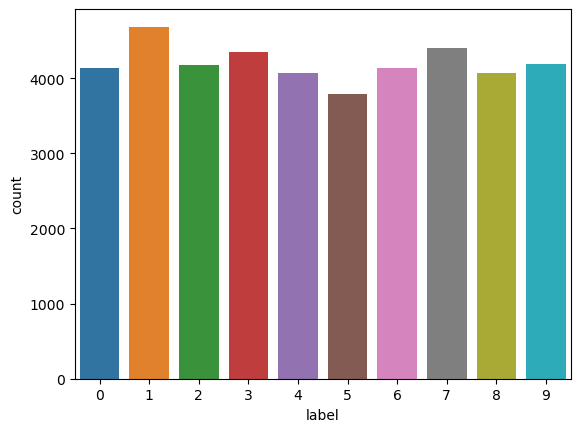

In [64]:
sns.countplot(x='label', data=train)

In [ ]:
# X_train = X_train.values.reshape(-1,28,28,1)
# X_test = X_test.values.reshape(-1,28,28,1)
# X_train.shape, X_test.shape

In [41]:
# Data normalization pixel range for neural networks from 1-255 gets the normalized range btw 0 and 1 

X_train = X_train/255
X_test = X_test/255


## Tensorflow and neural network

In [67]:
from tensorflow import keras
y_train = train['label'].tolist()
# x_train will be of size 42k and each index will be a list of 784 entries
  
'''
[
  [1,2,3,4,45,5,66....784],
  [1,2,3,4,4,5.........784],
  [1,2,3,4,4,5,5,5.....784]
  .
  .
  .
  42000 items (lists)
]
'''

test = train.drop(['label'], axis=1, ).astype('int32')
x_train = list(test.iterrows())
print(x_train[1])


(1, pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int32)
